## Домашнее задание по блоку 05.04.2021. Корреляция и корреляционный анализ 
### Тихонова Инна

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14,6

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Задание 1**

Возьмите датасет Mortality and Water Hardness https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

In [2]:
df = pd.read_csv('water.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [4]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


**Задание 2**

Ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

 - Построить точечный график

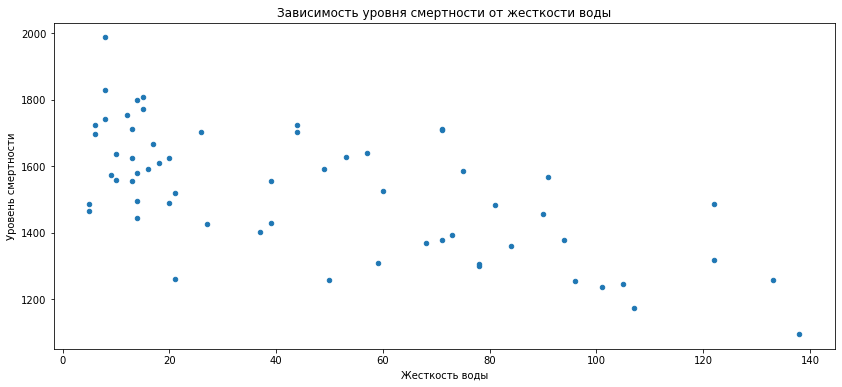

In [5]:
df.plot(kind = 'scatter', x = 'hardness', y = 'mortality')

plt.title('Зависимость уровня смертности от жесткости воды')
plt.ylabel('Уровень смертности')
plt.xlabel('Жесткость воды')

plt.show()

 - Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [6]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [7]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


 - Построить модель линейной регрессии

In [8]:
def linear(df):
    
    X = df[['hardness']]
    y = df['mortality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train) 
    
    print("Уравнение прямой: y = ", model.coef_[0], " * x + ", model.intercept_)
    
    y_pred = model.predict(X_test)
    residual = y_test - y_pred
    
    return model, residual, y_pred, X_test, y_test

In [9]:
model, residual, y_pred, X_test, y_test = linear(df)

Уравнение прямой: y =  -3.28204412683239  * x +  1681.6276209577732


 - Рассчитать коэффициент детерминации

In [10]:
model.score(X_test, y_test)

0.583655258547394

 - Вывести график остатков

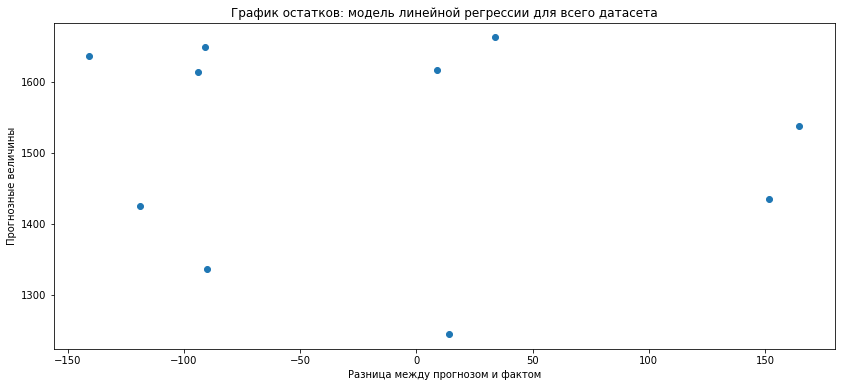

In [11]:
plt.scatter(residual, y_pred)

plt.title('График остатков: модель линейной регрессии для всего датасета')
plt.ylabel('Прогнозные величины')
plt.xlabel('Разница между прогнозом и фактом')

plt.show()

Вывод: между жесткостью воды и уровнем смертности есть обратная линейная зависимость, на уровне между средней и высокой степенью зависимости.

**Задание 3**

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

 - Разделить данные на 2 группы
 - Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [12]:
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [13]:
north = df[df['location'] == 'North']
south = df[df['location'] == 'South']

**Для северных городов:**

In [14]:
north.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


 - Построить точечный график

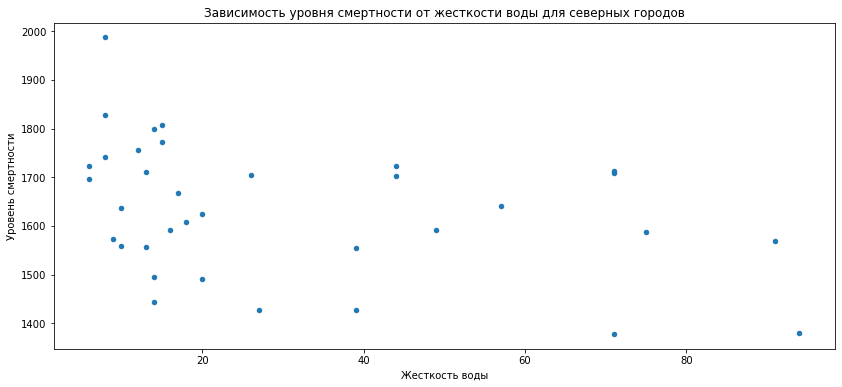

In [15]:
north.plot(kind = 'scatter', x = 'hardness', y = 'mortality')

plt.title('Зависимость уровня смертности от жесткости воды для северных городов')
plt.ylabel('Уровень смертности')
plt.xlabel('Жесткость воды')

plt.show()

 - Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [16]:
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [17]:
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


 - Построить модель линейной регрессии

In [18]:
model, residual, y_pred, X_test, y_test = linear(north)

Уравнение прямой: y =  -2.187097701863575  * x +  1696.5128220604054


 - Рассчитать коэффициент детерминации

In [19]:
model.score(X_test, y_test)

-0.11081361475476226

 - Вывести график остатков

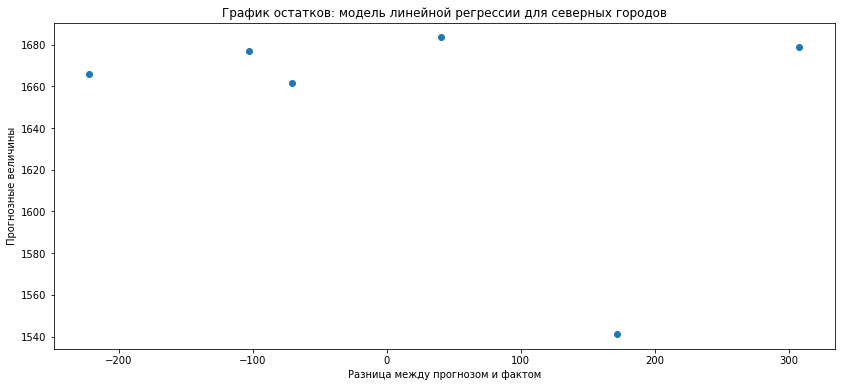

In [20]:
plt.scatter(residual, y_pred)

plt.title('График остатков: модель линейной регрессии для северных городов')
plt.ylabel('Прогнозные величины')
plt.xlabel('Разница между прогнозом и фактом')

plt.show()

Вывод для северных городов:
 - Между жесткостью воды и уровнем смертности есть обратная линейная зависимость, значительно слабее чем для всего датасета, на уровне средней.

**Для южных городов:**

In [21]:
south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


 - Построить точечный график

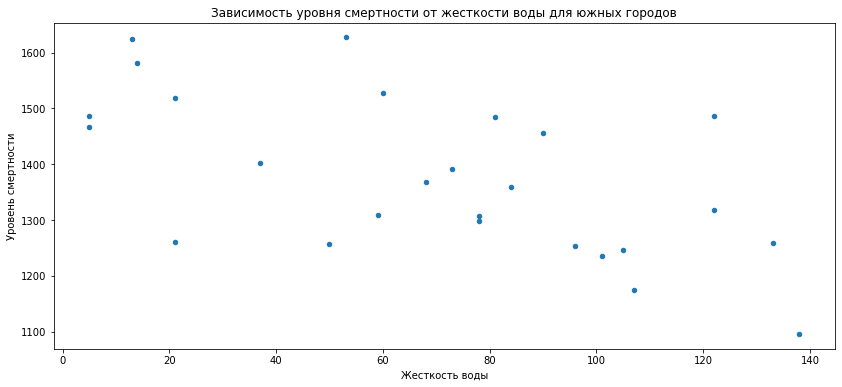

In [22]:
south.plot(kind = 'scatter', x = 'hardness', y = 'mortality')

plt.title('Зависимость уровня смертности от жесткости воды для южных городов')
plt.ylabel('Уровень смертности')
plt.xlabel('Жесткость воды')

plt.show()

 - Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [23]:
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [24]:
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


 - Построить модель линейной регрессии

In [25]:
model, residual, y_pred, X_test, y_test = linear(south)

Уравнение прямой: y =  -2.580126510690092  * x +  1546.6811229821606


 - Рассчитать коэффициент детерминации

In [26]:
model.score(X_test, y_test)

-0.7091284596403666

 - Вывести график остатков

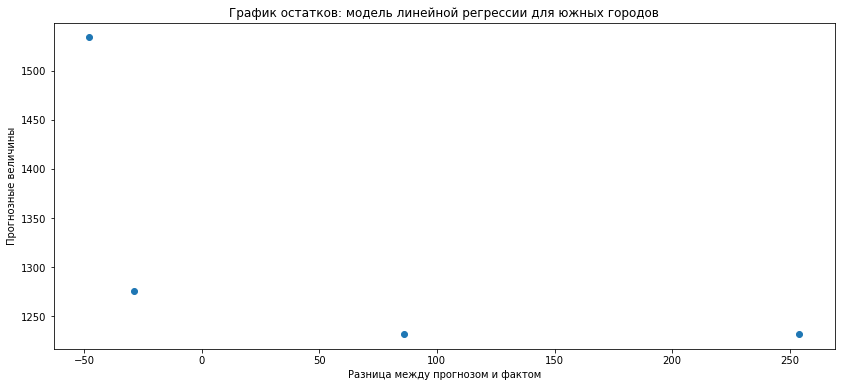

In [27]:
plt.scatter(residual, y_pred)

plt.title('График остатков: модель линейной регрессии для южных городов')
plt.ylabel('Прогнозные величины')
plt.xlabel('Разница между прогнозом и фактом')

plt.show()

Вывод для южных городов:
 - Между жесткостью воды и уровнем смертности есть обратная линейная зависимость той же силы, что для всего датасета.